In [18]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,MaxPooling2D,Flatten
from keras.preprocessing.image import ImageDataGenerator
import cv2
import matplotlib.pyplot as plt

In [19]:
train_datagen = ImageDataGenerator(rescale=1./255,horizontal_flip=True,rotation_range=90)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'data//train//',
        target_size=(32,28),
        batch_size=40,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        'data//validation//',
        target_size=(32,28),
        batch_size=40,
        class_mode='binary')

Found 144 images belonging to 2 classes.
Found 78 images belonging to 2 classes.


In [20]:
model = Sequential()
model.add(Conv2D(128,(3,3),input_shape=(32,28,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dropout(.3))
model.add(Dense(32,activation="relu"))
model.add(Dropout(.4))
model.add(Dense(1,activation="sigmoid"))

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 30, 26, 128)       3584      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 15, 13, 128)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 13, 11, 64)        73792     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 6, 5, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 3, 32)          18464     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 2, 1, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 64)                0         
__________

In [22]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [23]:
print(train_generator.class_indices)

{'car': 0, 'slot': 1}


In [24]:
model.fit_generator(
        train_generator,
        steps_per_epoch=500,
        epochs=8,
        validation_data=validation_generator,
        validation_steps=800)

Epoch 1/8
500/500 [==============================] - 129s 258ms/step - loss: 0.0606 - acc: 0.9767 - val_loss: 4.4624e-05 - val_acc: 1.0000
Epoch 2/8
500/500 [==============================] - 131s 261ms/step - loss: 0.0016 - acc: 0.9997 - val_loss: 1.0936e-07 - val_acc: 1.0000
Epoch 3/8
500/500 [==============================] - 145s 290ms/step - loss: 3.1031e-05 - acc: 1.0000 - val_loss: 1.0936e-07 - val_acc: 1.0000
Epoch 4/8
500/500 [==============================] - 136s 271ms/step - loss: 3.8004e-05 - acc: 1.0000 - val_loss: 1.0936e-07 - val_acc: 1.0000
Epoch 5/8
500/500 [==============================] - 167s 334ms/step - loss: 4.1328e-06 - acc: 1.0000 - val_loss: 1.0936e-07 - val_acc: 1.0000
Epoch 6/8
500/500 [==============================] - 161s 322ms/step - loss: 1.2557e-06 - acc: 1.0000 - val_loss: 1.0936e-07 - val_acc: 1.0000
Epoch 7/8
500/500 [==============================] - 164s 328ms/step - loss: 1.2067e-06 - acc: 1.0000 - val_loss: 1.0936e-07 - val_acc: 1.0000
Epoch 8

In [26]:
model.save("aaas_v4.h5")


In [6]:
img = cv2.imread("C:\\Users\\deadl\\Downloads\\Parking_system-master\\Driver_safety\\data\\train\\car\\1.png")

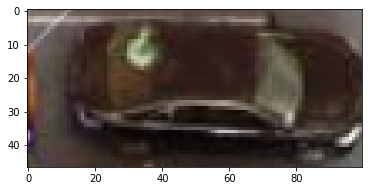

In [7]:
plt.imshow(img)

In [8]:
from keras.models import load_model

In [9]:
model = load_model("car_nocar_v2.h5")

In [12]:
model.predict_classes(cv2.resize(img,(50,50)).reshape(1,50,50,3))[0][0]

0